In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

data ===> type: <class 'numpy.ndarray'> | shape: (2520,) | dtype: [('age', 'i1')]
Min:  15
Max:  90
Mean:  63.28452380952381


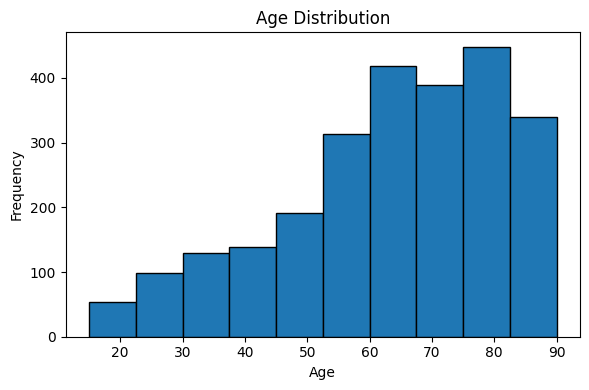

In [2]:
# Load data
data_path = '/Users/chetankumar/Library/CloudStorage/OneDrive-OldDominionUniversity/jlab_test/data/eICU_age.npy'
data = np.load(data_path)
print(f'data ===> type: {type(data)} | shape: {data.shape} | dtype: {data.dtype}')

data = data['age']
print("Min: ", data.min())
print("Max: ", data.max())
print("Mean: ", data.mean())

# Plot data distribution
plt.figure(figsize=(6, 4))
plt.hist(data, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [3]:
# Normalize data
data = data.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
data_norm = scaler.fit_transform(data).flatten()

In [4]:
class GAN(tf.keras.Model):
    def __init__(self, latent_dim=16):
        super().__init__()
        self.latent_dim = latent_dim

        # Generator
        self.generator = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(latent_dim,)),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])

        # Descriminator
        self.discriminator = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(1,)),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])

        self.bce = tf.keras.losses.BinaryCrossentropy()
        self.g_opt = tf.keras.optimizers.Adam(1e-3)
        self.d_opt = tf.keras.optimizers.Adam(1e-3)

    @tf.function
    def train_step(self, real_batch):
        batch_size = tf.shape(real_batch)[0]
        real_batch = tf.reshape(real_batch, (batch_size, 1))

        # Train discriminator
        noise = tf.random.normal((batch_size, self.latent_dim))

        with tf.GradientTape() as d_tape:
            generated = self.generator(noise, training=True)

            real_logits = self.discriminator(real_batch, training=True)
            generated_logits = self.discriminator(generated, training=True) 

            d_loss_real = self.bce(tf.ones_like(real_logits), real_logits)
            d_loss_generated = self.bce(tf.zeros_like(generated_logits), generated_logits)
            d_loss = d_loss_real + d_loss_generated

        d_grads = d_tape.gradient(d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(d_grads, self.discriminator.trainable_variables))

        # Train generator
        noise = tf.random.normal((batch_size, self.latent_dim))
        with tf.GradientTape() as g_tape:
            generated = self.generator(noise, training=True)
            generated_logits = self.discriminator(generated, training=True)
            g_loss = self.bce(tf.ones_like(generated_logits), generated_logits)

        g_grads = g_tape.gradient(g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(g_grads, self.generator.trainable_variables))

        return d_loss, g_loss
    
    def sample(self, n):
        noise = tf.random.normal((n, self.latent_dim))
        return self.generator(noise, training=False).numpy().flatten()        

In [5]:
dataset = tf.data.Dataset.from_tensor_slices(data_norm).shuffle(len(data_norm)).batch(128)

In [6]:
model = GAN()
epochs = 1000
d_loss_list = []
g_loss_list = []
for epoch in range(epochs):
    d_losses = 0
    g_losses = 0
    for real_batch in dataset:
        d_loss, g_loss = model.train_step(real_batch)
        d_losses += d_loss
        g_losses += g_loss
    d_loss = np.mean(d_losses)
    g_loss = np.mean(g_losses)
    d_loss_list.append(d_loss)
    g_loss_list.append(g_loss)
    
    if epoch % 200 == 0:
        print(f"epoch:{epoch}, d_loss:{d_loss}, g_loss:{g_loss}")

2025-11-26 18:56:08.198310: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:08.217415: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:08.235707: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:08.254423: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:08.271225: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:08.284114: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:08.296752: W tensorflow/core/framework/local_rendezvous.cc:404] L

epoch:0, d_loss:27.718971252441406, g_loss:13.549201965332031


2025-11-26 18:56:08.400409: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:08.413209: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:08.426503: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:08.440033: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:08.453047: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:08.465504: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:08.478269: W tensorflow/core/framework/local_rendezvous.cc:404] L

epoch:200, d_loss:27.77508544921875, g_loss:13.801036834716797


2025-11-26 18:56:10.872884: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:10.886106: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:10.898734: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:10.911317: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:10.923465: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:10.935689: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:10.947486: W tensorflow/core/framework/local_rendezvous.cc:404] L

epoch:400, d_loss:27.725894927978516, g_loss:13.862947463989258


2025-11-26 18:56:13.142845: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:13.155234: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:13.167483: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:13.179861: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:13.192285: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:13.204287: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:13.216119: W tensorflow/core/framework/local_rendezvous.cc:404] L

epoch:600, d_loss:27.725894927978516, g_loss:13.862947463989258


2025-11-26 18:56:15.625301: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:15.637281: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:15.649007: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:15.660427: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:15.672344: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:15.683950: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:15.695440: W tensorflow/core/framework/local_rendezvous.cc:404] L

epoch:800, d_loss:27.725894927978516, g_loss:13.862947463989258


2025-11-26 18:56:18.108955: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:18.121068: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:18.132982: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:18.144887: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:18.156743: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:18.168481: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-26 18:56:18.180340: W tensorflow/core/framework/local_rendezvous.cc:404] L

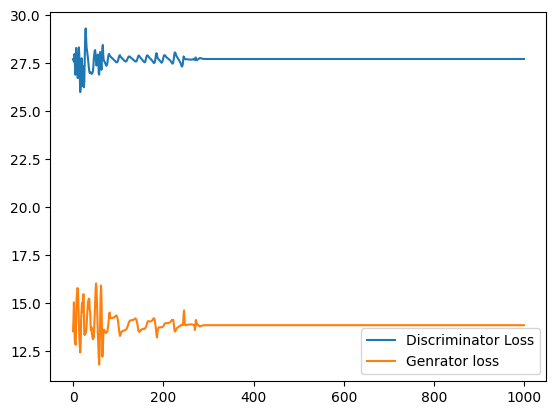

In [7]:
plt.plot(d_loss_list, label='Discriminator Loss')
plt.plot(g_loss_list, label='Genrator loss')
# plt.yscale('log')
plt.legend()

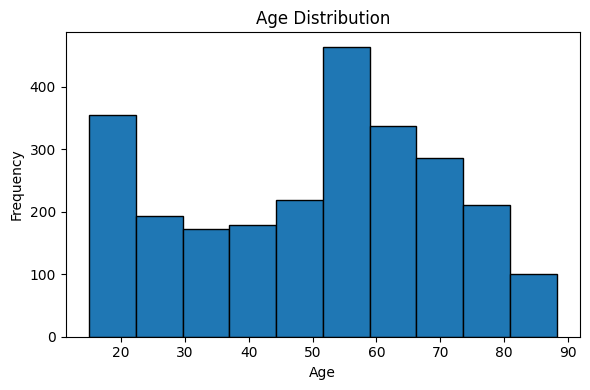

In [9]:
# Generate data
samples_scaled = model.sample(2520).reshape(-1, 1)
samples = scaler.inverse_transform(samples_scaled).flatten()
# Plot data distribution
plt.figure(figsize=(6, 4))
plt.hist(samples, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()